##  Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import re

!pip install --upgrade wordcloud
from wordcloud import WordCloud

import time
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

C:\Users\lovep\Anaconda\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lovep\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data = pd.read_csv('./data/spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
print(data.duplicated().sum())
data[data.duplicated()]

403


,v1,v2
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [5]:
data = data.drop_duplicates()

In [6]:
data.rename(columns={'v1':'spam_ham','v2':'message'},inplace=True)
data.columns

Index(['spam_ham', 'message'], dtype='object')

In [7]:
data = data[['message','spam_ham']]

spam_ham
ham     4516
spam     653
Name: count, dtype: int64


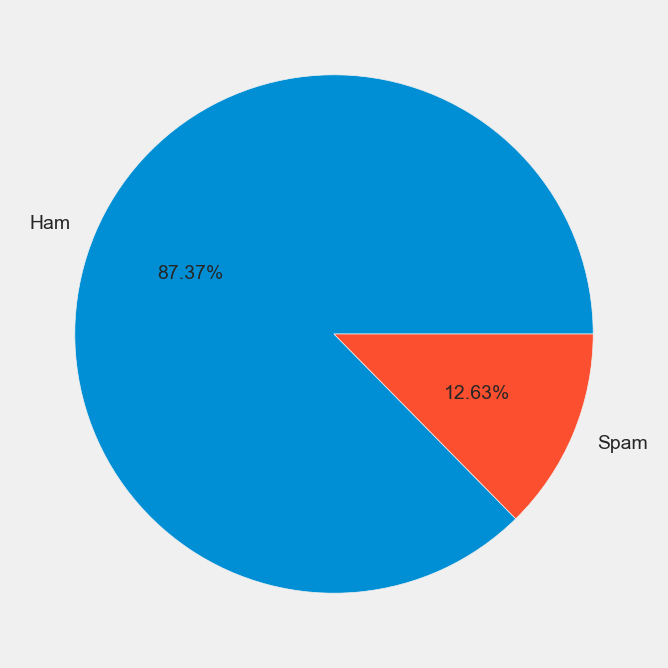

In [8]:
print(data.spam_ham.value_counts())
plt.figure(figsize=(12,8))

# data.spam_ham.hist()
plt.pie(data.spam_ham.value_counts(),labels=['Ham','Spam'],autopct='%0.2f%%')
plt.show()

plt.show()

### from here we know that the dataset is highly skewed and mainly consist of ham data

In [9]:
lb = LabelEncoder()

data.spam_ham = lb.fit_transform(data.spam_ham) 

# print(data['spam_ham'].unique())

In [10]:
data.head()

,message,spam_ham
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [11]:
data.rename(columns={'spam_ham':'spam'},inplace=True)

## Data Transformation 

In [12]:
# a = data.iloc[2].message
# # b= a
# a

In [13]:
lem = WordNetLemmatizer()
ps = PorterStemmer()

In [14]:
# a.lower()

In [15]:
# a = re.sub('[^a-zA-Z]',' ',a)
# # b = re.sub('[^a-zA-Z]',' ',b)
# a

In [16]:
# a = a.split()
# # b = b.split()
# a

In [17]:
# corpus = [ ]
# review = [lem.lemmatize(word) for word in a if word not in stopwords.words('english') ]
# review = ' '.join(review)
# print(review)
# corpus.append(review)

# len(corpus)

In [18]:
# import time
# ps = PorterStemmer()
# st = time.time()
# b = [ps.stem(word) for word in b if word not in stopwords.words('english')]
# b
# et = time.time()
# print(et-st)

In [19]:
# import time
# st = time.time()
# a = [lem.lemmatize(word) for word in a if word not in stopwords.words('english')]
# a
# et = time.time()
# print(et-st)

In [20]:
# ps = PorterStemmer()

# corpus = []
# st = time.time()        
# for i in range(0,len(data)):
#     review = re.sub('[^a-zA-Z]',' ',data.iloc[i]['message'])
#     review = review.lower()
#     review = review.split()
    
#     review = [ps.stem(word) for word in review if word not in stopwords.words('english') ]
#     review = ' '.join(review)
#     corpus.append(review)
# et = time.time()    
# print(et-st)

In [21]:
# corpus = []
# st = time.time()        
# for i in range(0,len(data)):
#     review = re.sub('[^a-zA-Z]',' ',data.iloc[i]['message'])
#     review = review.lower()
#     review = review.split()
    
#     review = [lem.lemmatize(word) for word in review if word not in stopwords.words('english') ]
#     review = ' '.join(review)
#     corpus.append(review)
# et = time.time()    
# print(et-st)

In [22]:
def transform_text(data): 
    text = re.sub('[^a-zA-Z]',' ',data)
    text = text.lower()
    text = text.split()
    
    transformed_text = [lem.lemmatize(word) for word in text if word not in stopwords.words('english') ]
    transformed_text = ' '.join(transformed_text)
    return transformed_text

In [23]:
# def transform_text1(data): 
#     text = re.sub('[^a-zA-Z]',' ',data)
#     text = text.lower()
#     text = text.split()
    
#     transformed_text = [ps.stem(word) for word in text if word not in stopwords.words('english') ]
#     transformed_text = ' '.join(transformed_text)
#     return transformed_text

In [24]:
# st = time.time()        

# data['transformed_text1'] = data.message.apply(transform_text1)
# et = time.time()
# print(et-st)
# data.head()

In [25]:
st = time.time()        

data['transformed_text'] = data.message.apply(transform_text)
et = time.time()
print(et-st)
data.head()

33.61790990829468


,message,spam,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry wkly comp win fa cup final tkts st ...
3,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",0,nah think go usf life around though


In [26]:
data['num_characters'] = data.message.apply(len)
data['lem_num_characters'] = data.transformed_text.apply(lambda x : len(nltk.word_tokenize(x)))
data['num_sentence'] = data.transformed_text.apply(lambda x : len(nltk.sent_tokenize(x)))

In [27]:
data.head()

,message,spam,transformed_text,num_characters,lem_num_characters,num_sentence
0,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...,111,16,1
1,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni,29,6,1
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry wkly comp win fa cup final tkts st ...,155,21,1
3,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say,49,9,1
4,"Nah I don't think he goes to usf, he lives aro...",0,nah think go usf life around though,61,7,1


In [28]:
# data = data[['transformed_text','spam']]
# data.sample(1)

In [29]:
# data.num_sentence.value_counts()

### Data Visualization & Wordcloud for Spam

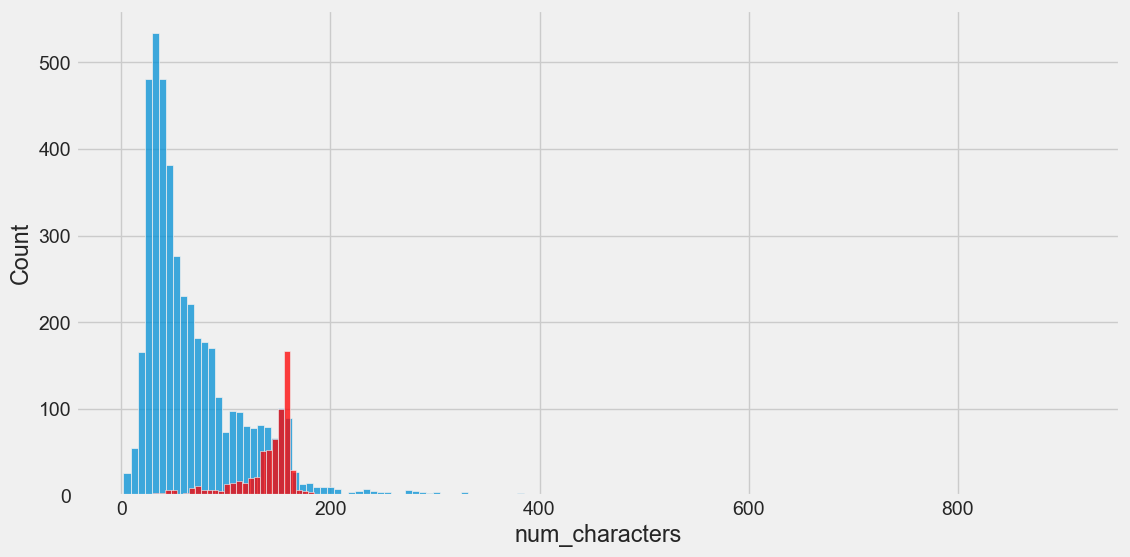

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['spam'] == 0]['num_characters'])
sns.histplot(data[data['spam'] == 1]['num_characters'],color='red')
plt.show()

In [31]:
#  sns.pairplot(data,hue='spam')

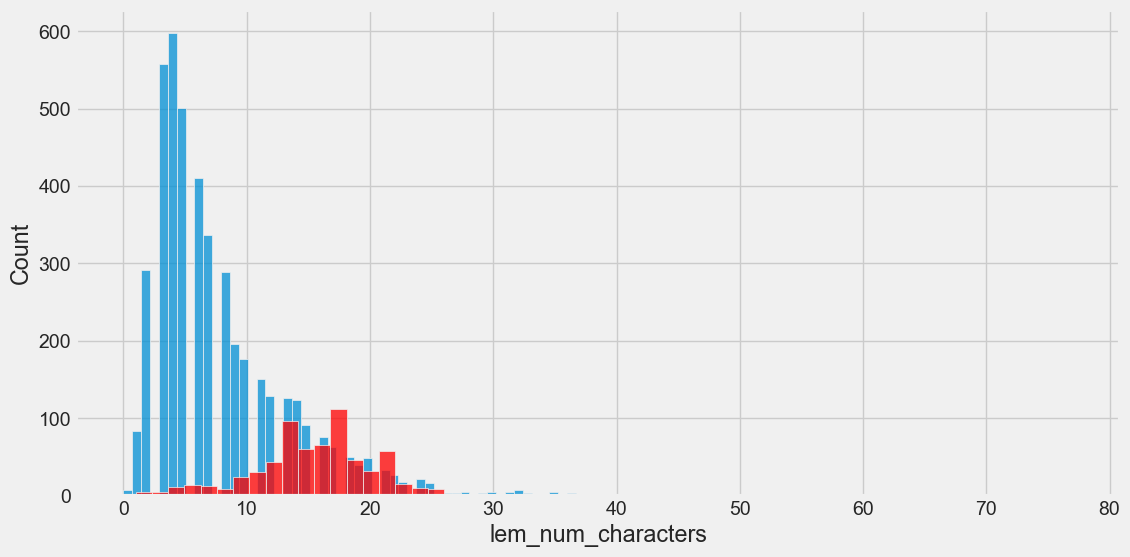

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['spam'] == 0]['lem_num_characters'])
sns.histplot(data[data['spam'] == 1]['lem_num_characters'],color='red')
plt.show()

In [33]:
wc = WordCloud(width=1000,height=1000,min_font_size=8,background_color='white')

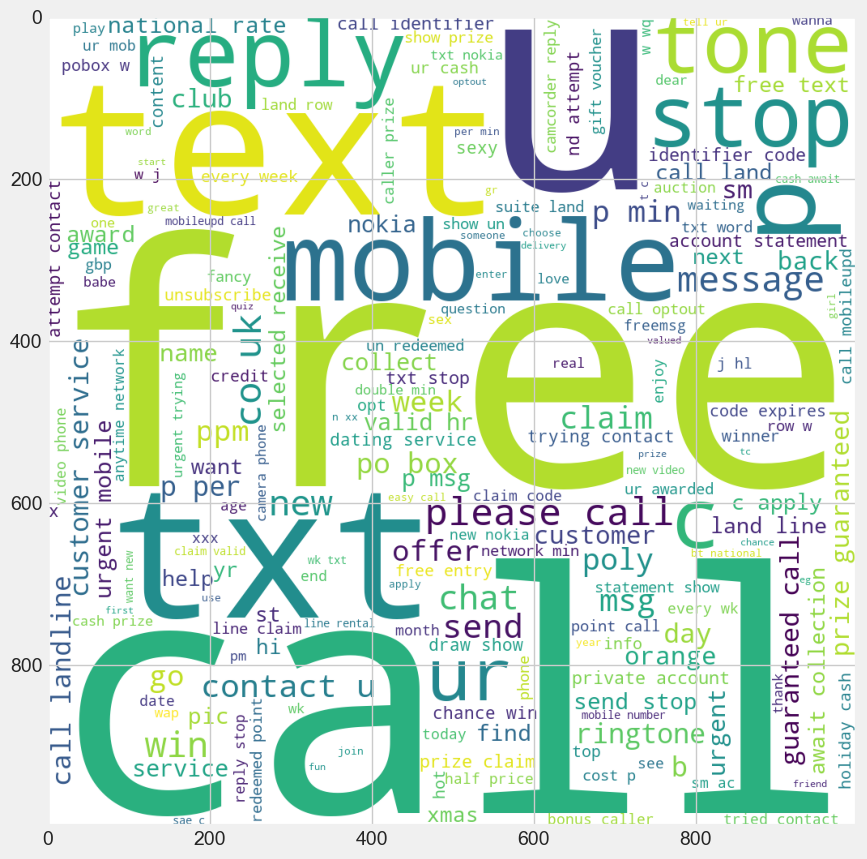

In [34]:
spam_wc = wc.generate(data[data.spam==1].transformed_text.str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)
plt.show()

###  Wordcloud for Ham

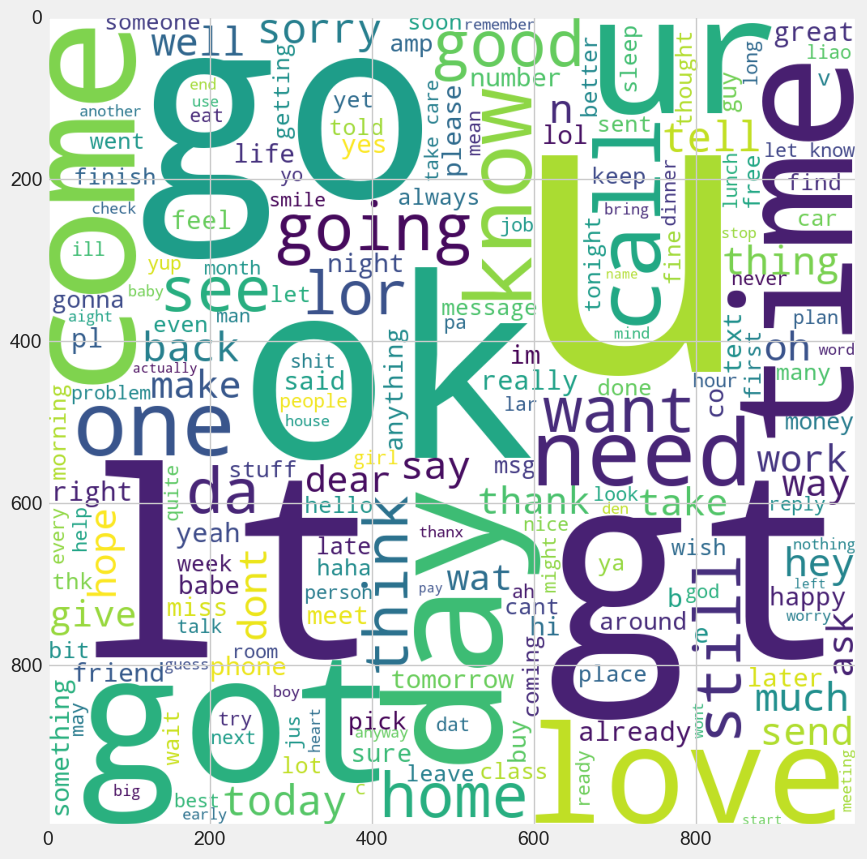

In [35]:
spam_wc = wc.generate(data[data.spam==0].transformed_text.str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)
plt.show()

In [36]:
spam_corpus=[]

for msg in tqdm(data[data.spam==1]['transformed_text'].to_list()):
    for word in msg.split():
        spam_corpus.append(word)
        
len(spam_corpus)        

100%|████████████████████████████████████████████████████████████████████████████| 653/653 [00:00<00:00, 163145.13it/s]


10068

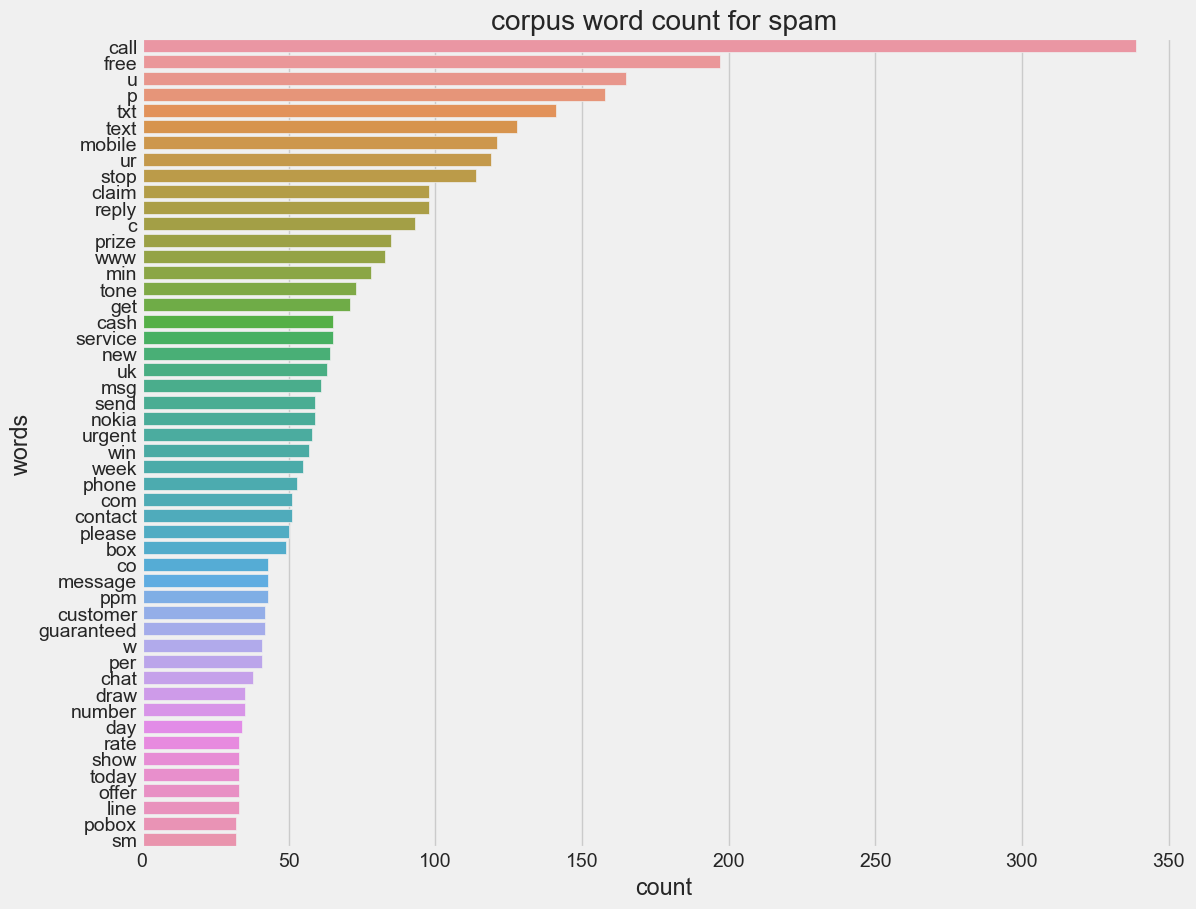

In [37]:
from collections import Counter

spam_top_50_words = pd.DataFrame(Counter(spam_corpus).most_common(50))
# spam_top_50_words

plt.figure(figsize=(12,10))
sns.barplot(y=spam_top_50_words[0],x=spam_top_50_words[1])
plt.ylabel('words')
plt.xlabel('count')
plt.title('corpus word count for spam')
plt.yticks(rotation='horizontal')
plt.show()

In [38]:
ham_corpus=[]

for msg in tqdm(data[data.spam==0]['transformed_text'].to_list()):
    for word in msg.split():
        ham_corpus.append(word)
        
len(ham_corpus) 

100%|██████████████████████████████████████████████████████████████████████████| 4516/4516 [00:00<00:00, 270546.15it/s]


35388

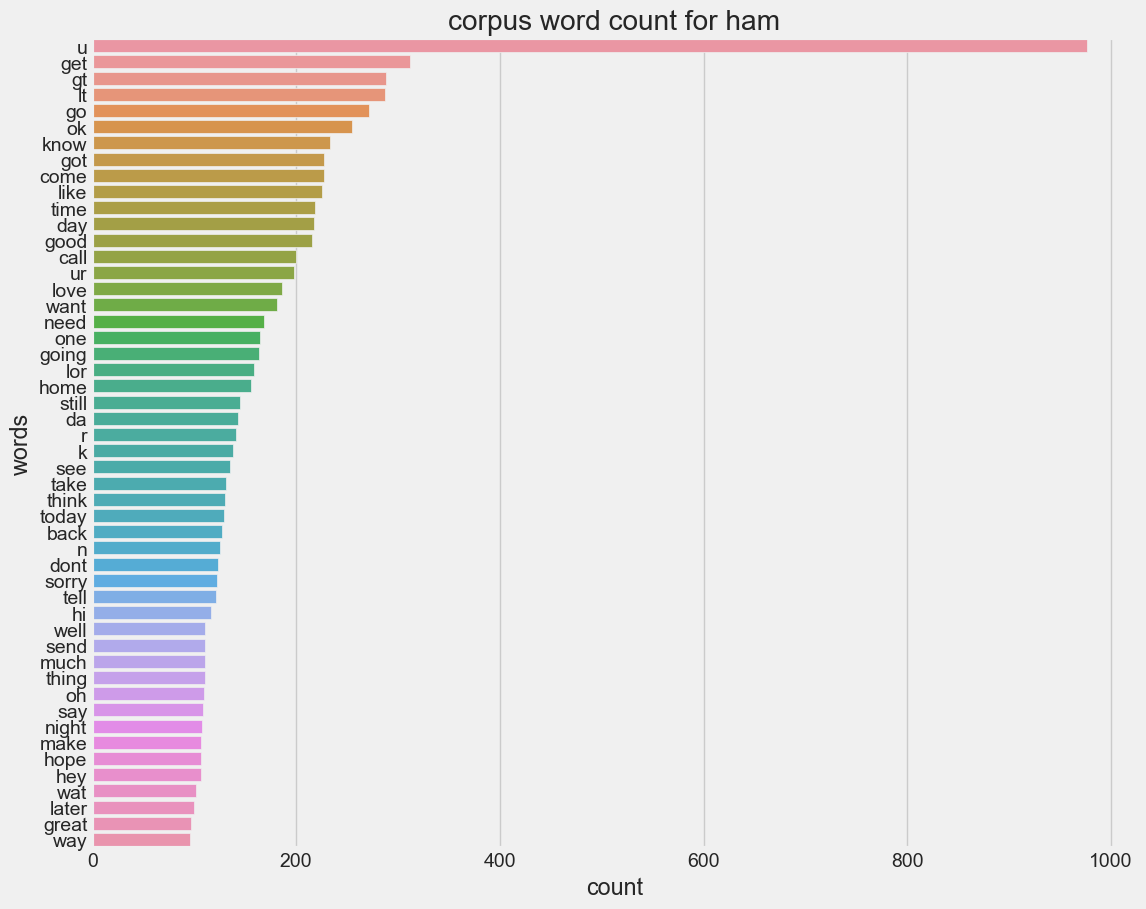

In [39]:
ham_top_50_words = pd.DataFrame(Counter(ham_corpus).most_common(50))
# ham_top_50_words

plt.figure(figsize=(12,10))
sns.barplot(y=ham_top_50_words[0],x=ham_top_50_words[1])
plt.ylabel('words')
plt.xlabel('count')
plt.title('corpus word count for ham')
plt.yticks(rotation='horizontal')
plt.show()
plt.show()

In [40]:
cv = CountVectorizer(max_features=2500)
# tfidf = TfidfVectorizer(max_features=2500,min_df=20)
X = cv.fit_transform(data.transformed_text)
# X = tfidf.fit_transform(data.transformed_text)
print(type(X),X.shape)
X = X.toarray()
type(X)

<class 'scipy.sparse.csr.csr_matrix'> (5169, 2500)


numpy.ndarray

In [41]:
y = data.spam
y[:10]

0    0
1    0
2    1
3    0
4    0
5    1
6    0
7    0
8    1
9    1
Name: spam, dtype: int32

In [42]:
type(y.value_counts().values)

numpy.ndarray

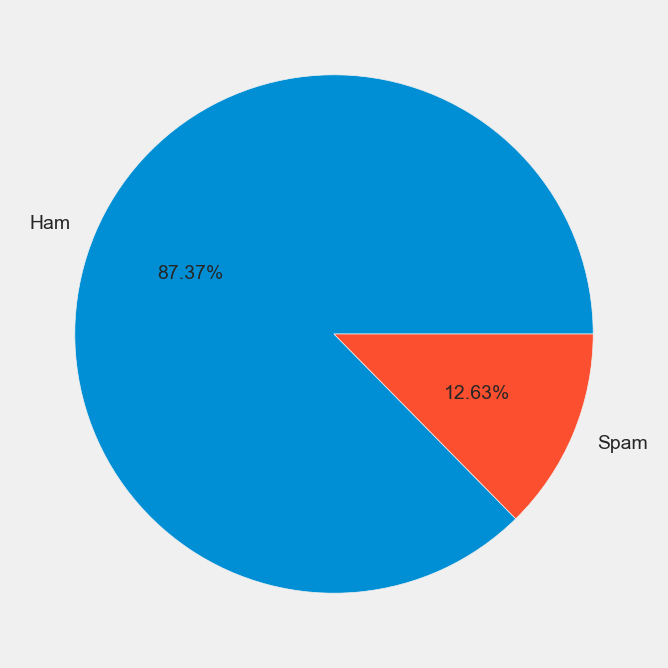

In [43]:
plt.figure(figsize=(12,8))
plt.pie(y.value_counts(),labels=['Ham','Spam'],autopct='%0.2f%%')
plt.show()

##  Train Test Split the Data

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(4135, 2500) (4135,) (1034, 2500) (1034,)


##  Model Training


###  Naive Bayes Model

In [45]:
model = MultinomialNB().fit(X_train,y_train)
print("Model Training score : ",model.score(X_train,y_train))

Model Training score :  0.9898428053204353


In [46]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

#function to evaluate the performance of model
def evaluate_model_performance(model,x_test,y_test):
    y_pred=model.predict(x_test)
    print("Accurary Score : {}".format(np.round(accuracy_score(y_test,y_pred)*100,decimals=2)))
    print("Precision Score : {}".format(np.round(precision_score(y_test,y_pred)*100,decimals=2)))
    print("Recall Score : {}".format(np.round(recall_score(y_test,y_pred)*100,decimals=2)))
    print("F1 Score : {}".format(np.round(f1_score(y_test,y_pred)*100,decimals=2)))
    cm=confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,fmt="d",annot=True,cmap="Blues")
    plt.show()
    print("*Classification Report*********************************************")
    print(classification_report(y_test,y_pred))

Accurary Score : 97.58
Precision Score : 88.96
Recall Score : 94.48
F1 Score : 91.64


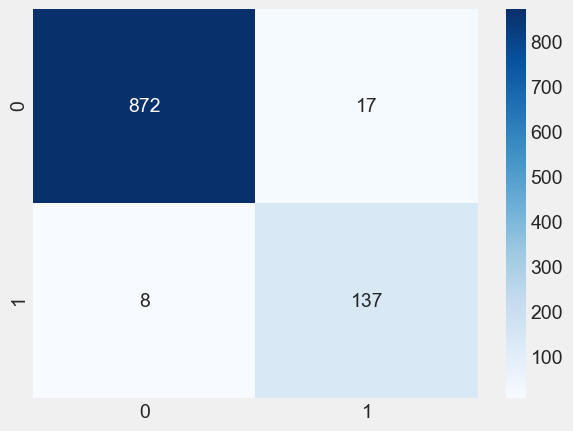

*Classification Report*********************************************
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       889
           1       0.89      0.94      0.92       145

    accuracy                           0.98      1034
   macro avg       0.94      0.96      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [47]:
#model performance
evaluate_model_performance(model,X_test,y_test)

###  BERT Model


In [48]:
# import sys
# print("Python version:", sys.version)

In [49]:
# !pip install --upgrade tensorflow-hub
# !pip uninstall tensorflow-text
# !pip install tensorflow-text
# import tensorflow as tf
# import tensorflow_hub as hub
# import tensorflow_text as text

In [50]:
# bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
# bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [51]:
# # Bert layers
# text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
# preprocessed_text = bert_preprocess(text_input)
# outputs = bert_encoder(preprocessed_text)

# # Neural network layers
# l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
# l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# # Use inputs and outputs to construct a final model
# model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [52]:
# METRICS = [
#       tf.keras.metrics.BinaryAccuracy(name='accuracy'),
#       tf.keras.metrics.Precision(name='precision'),
#       tf.keras.metrics.Recall(name='recall')
# ]

# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=METRICS)

In [53]:
# model.fit(X_train, y_train, epochs=10)


In [54]:
# model.evaluate(X_test, y_test)

In [55]:
def predict(text):      
    text_list = [text]
    text = cv.transform(text_list)
    predict = model.predict(text)[0]
    if predict == 0 :
        print('************************ham************************')
    else:
        print('************************spam************************')
#         print('spam')
    return predict

In [ ]:
text = input("Enter the message to check for spam: ")
print('\n')
predict(text)

In [ ]:
import pickle

pickle.dump(cv,open('cv.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))

In [ ]:
# import re

# text = " <a href='https://example.com'>links</a> and <img src='image.jpg'/>."

# regex_pattern = r'(<[\w\s]*/?>)'
# matches = re.findall(regex_pattern, text)

# print(matches)
